# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# **PROYECTO SPRINT 11**

### **Descripción del proyecto**

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos

#### **Descripción de los datos**

Cada entrada de registro es una acción de usuario o un evento.

EventName: nombre del evento.
DeviceIDHash: identificador de usuario unívoco.
EventTimestamp: hora del evento.
ExpId: número de experimento. 246 y 247 son los grupos de control, y 248 es el grupo de prueba.

### **Instrucciones para completar el proyecto**

## **Paso 1. Abrir el archivo de datos y leer la información general**

In [1]:
# Importar liberías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# Leer los datos

registros = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
registros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
registros.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


Luego de la lectura de los datos se obtiene el DataFrame 'registros' que contiene 4 columnas 'EventName' correspondiente a los nombres de los eventos, 'DeviceIDHash' es el identificador de cada usuario, 'EventTimestamp' fecha y hora del evento y la columna 'ExpId' indicando el grupo de la prueba.
En total este DataFrame contiene 244126 filas, al parecer todos los datos son no nulos. Mas adelante se realizará el cambio del tipo de datos de la columna que contien la información de fecha y hora de cada evento al tipo de datos datetime.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buena primera sección: hiciste una carga ordenada del archivo, mostraste un resumen de estructura del DataFrame con `info()` y diste una lectura clara de las primeras filas. Esto sienta una base sólida para continuar con la exploración y transformación de los datos. </div>


## **Paso 2. Preparar los datos para el análisis**

### **2.1. Cambia el nombre de las columnas de manera que sea conveniente para ti**

In [5]:
# Renombrar columnas

registros.columns = ['event_name', 'user_id', 'event_time', 'group']

registros.head()

,event_name,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Se cambio el nombre de las columnas a nombres que fueran más descriptivos y que se pudieran comprender facilmente. Los nombres de las nuevas columnas son 'event_name', 'user_id', 'event_time', 'group' reemplazando los nombres anteriores 'EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId' respectivamente.

### **2.2. Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario**

In [6]:
# Comprobar los valores ausentes

registros.isnull().sum()

event_name    0
user_id       0
event_time    0
group         0
dtype: int64

Se puede comprobar que en el DataFrame 'registros' no se encuentran valores ausentes en ninguga de sus columnas. Esto de igual manera se comentó anteriormente en el analisis de lectura de datos.

In [7]:
# Analizando el tipo de datos

registros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_time  244126 non-null  int64 
 3   group       244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


En cuanto al tipo de datos ya se comentó anteriormente en el punto de la lectura de datos. Es necesario realizar el cambio de tipo de datos de la columna 'event_time' de object a datetime, este cambio se realizará en el siguiente punto.
    

### **2.3. Agrega una columna de fecha y hora y una columna separada para las fechas**

In [8]:
registros['event_time'] = pd.to_datetime(registros['event_time'], unit='s')

registros['event_date'] = registros['event_time'].dt.date

registros.head()

,event_name,user_id,event_time,group,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Se realizó el cambio del tipo de datos de la columna 'event_time' de object a date time. Además, se creo una nueva columna con la fecha separada que incluye año, mes y día.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen manejo en esta etapa: validaste correctamente los valores nulos, confirmaste los tipos de datos y transformaste exitosamente las marcas de tiempo en formato `datetime`, incluyendo una columna adicional para la fecha. Esto facilita mucho los análisis posteriores por día. Excelente progreso. </div>


## **Paso 3.  Estudiar y comprobar los datos**

### **3.1. ¿Cuántos eventos hay en los registros?**

In [9]:
# Encontrar la cantidad de eventos que hay en el DataFrame de 'registros'

cantidad_eventos = registros.shape[0]

print(f"La cantidad total de eventos en el DataFrame 'registros' es: {cantidad_eventos}")

La cantidad total de eventos en el DataFrame 'registros' es: 244126


### **3.2. ¿Cuántos usuarios hay en los registros?**

In [10]:
# Encontrar la cantidad de usuarios que hay en el dataFrame 'registros'

cantidad_usuarios = registros['user_id'].nunique()

print(f"La cantidad total de usuarios en el DataFrame 'registros' es: {cantidad_usuarios}")

La cantidad total de usuarios en el DataFrame 'registros' es: 7551


### **3.3. ¿Cuál es el promedio de eventos por usuario?**

In [11]:
# Calcular el promedio de eventos por usuario

promedio_evento_usuario = round(cantidad_eventos / cantidad_usuarios, 2)

print(f"El promedio de eventos por usuario es de: {promedio_evento_usuario}")

El promedio de eventos por usuario es de: 32.33


### **3.4. ¿Qué periodo de tiempo cubren los datos?**

Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [12]:
# Encontrar la fecha mínima y máxima de los eventos

fecha_inicio = registros['event_date'].min()

fecha_final = registros['event_date'].max()

print('La fecha de inicio de los eventos es:', fecha_inicio)
print('La fecha final de los eventos es:', fecha_final)

La fecha de inicio de los eventos es: 2019-07-25
La fecha final de los eventos es: 2019-08-07


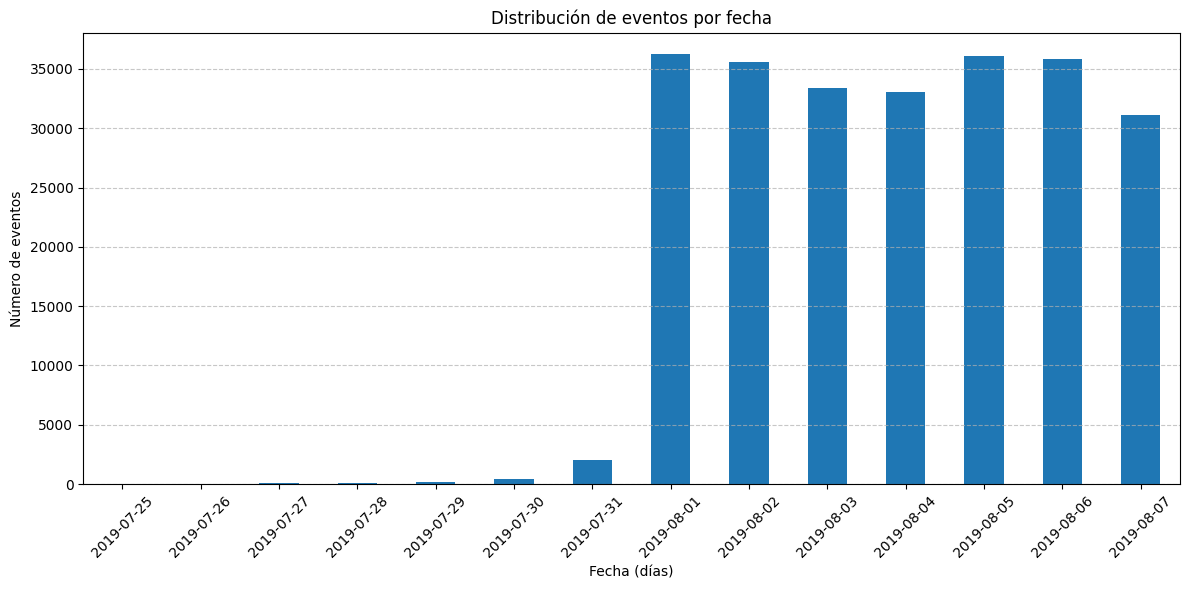

In [13]:
# Graficar un histograma por fecha y hora

eventos_por_fecha = registros.groupby('event_date').agg(total_eventos=('event_date', 'count'))

plt.figure(figsize=(12, 6))

eventos_por_fecha['total_eventos'].plot(kind='bar')
plt.title('Distribución de eventos por fecha')
plt.xlabel('Fecha (días)')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

In [14]:
# Contamor los eventos por fecha 

eventos_por_dia = registros['event_date'].value_counts().sort_index()

print(eventos_por_dia)

2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: event_date, dtype: int64


Al inicio de los registros de datos, concretamente, entre los días 25 de julio y 31 de julio, los registros recopilados son muy pocos, presentando para el día 25 de julio 0 registros y para el 31 de julio un aproximado de 2000 eventos. 

Se observa notablemente, que a partir del 1 de agosto la cantidad de registros asciende por encima de 35000 eventos fluctuando en los siguientes días hasta 31000 aproximadamente para el último día de actividad el 7 de agosto.

Es muy posible, que no se haya registrado la información completa para los días de julio y que parte de la información de estos primeros días haya quedado registrada en los días de agosto. Por lo tanto, los datos se empiezan a registrar completos es a partir del día 1 de agosto hasta el final de los registros el 7 de agosto.

### **3.5. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?**

In [15]:
# Filtrar los datos a partir del 1 de agosto

fecha_de_corte = pd.to_datetime('2019-08-01').date()

registros_filtrados = registros[registros['event_date'] >= fecha_de_corte]

registros_filtrados.head()

,event_name,user_id,event_time,group,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


In [16]:
# Encontrar la cantidad de eventos y usuarios después del filtrado 

eventos_filtrados = registros_filtrados.shape[0]

usuarios_filtrados = registros_filtrados['user_id'].nunique()

print(f"La cantidad total de eventos filtrados es: {eventos_filtrados}")

print(f"La cantidad total de usuarios filtrados es: {usuarios_filtrados}")


La cantidad total de eventos filtrados es: 241298
La cantidad total de usuarios filtrados es: 7534


In [17]:
# Encontrar la cantidad de eventos excluidos

eventos_excluidos = cantidad_eventos - eventos_filtrados

porcentaje_eventos_excluidos = round((eventos_excluidos / cantidad_eventos) * 100, 2)

print(f"La cantidad total de eventos excluidos es: {eventos_excluidos}")

print(f"El porcentaje eventos excluidos es: {porcentaje_eventos_excluidos}")    


La cantidad total de eventos excluidos es: 2828
El porcentaje eventos excluidos es: 1.16


In [18]:
# Encontrar la cantidad de usuarios excluidos

usuarios_excluidos = cantidad_usuarios - usuarios_filtrados

porcentaje_usuarios_excluidos = round((usuarios_excluidos / cantidad_usuarios) * 100, 2)

print(f"La cantidad total de usuarios excluidos es: {usuarios_excluidos}")

print(f"El porcentaje usuarios excluidos es: {porcentaje_usuarios_excluidos}") 


La cantidad total de usuarios excluidos es: 17
El porcentaje usuarios excluidos es: 0.23


Se realizó un filtrado de los datos excluyendo los datos del 27 al 31 de julio. Por lo tanto, el DataFrame obtenido 'registros_filtrados' considera los datos del 1 al 7 de agosto.

La cantidad de eventos excluidos fue de 2828, inicialmente se tenían 244126 eventos, después del filtrado se tienen 241298. El porcentaje de eventos excluidos es de 1.16%.

En cuanto a los usuarios excluidos fueron 17 usuarios, inicialmente se tenían 7551 usuarios, después del filtrado se tienen 7534 usuarios. El porcentaje de usuarios excluidos es de 0.23%.

### **3.6. Asegúrate de tener usuarios de los tres grupos experimentales**

In [19]:
# Encontrar la cantidad de usuarios por grupo después del filtrado

usuarios_por_grupo = registros_filtrados.groupby('group')['user_id'].nunique()

usuarios_por_grupo

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Las cantidades de usuarios por cada grupo, son las siguientes:
- Grupo 246, cuenta con 2484 usuarios.
- Grupo 247, cuenta con 2513 usuarios.
- Grupo 248, cuenta con 2537 usuarios.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy completo y bien estructurado tu análisis inicial. Calculaste correctamente las métricas clave, analizaste la distribución temporal con apoyo gráfico y filtraste el periodo útil con un buen criterio técnico. Además, verificaste la representatividad de los tres grupos experimentales tras el filtrado. Muy buen trabajo en esta sección. </div>


## **Paso 4. Estudiar el embudo de eventos**

### **4.1. Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia**

In [20]:
# Obtener la frecuencia de cada evento

frecuencia_eventos = registros_filtrados['event_name'].value_counts()

frecuencia_eventos

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64

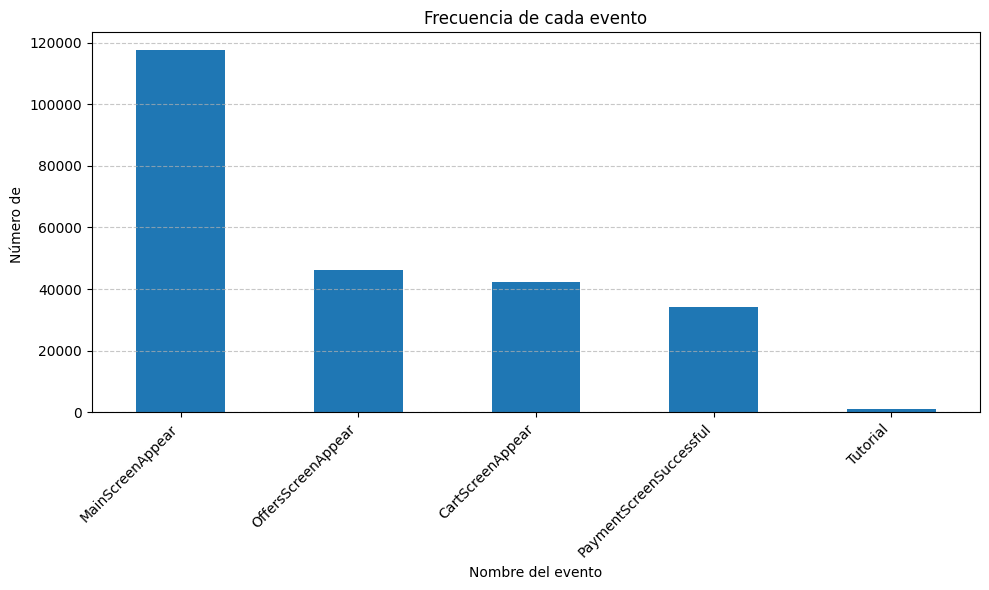

In [21]:
# Graficar la frecuencia de eventos

plt.figure(figsize=(10, 6))

frecuencia_eventos.plot(kind='bar')

plt.title('Frecuencia de cada evento')
plt.xlabel('Nombre del evento')
plt.ylabel('Número de ')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Como era de esperarse, la frecuencia de eventos va de mayor a menor que es el comportamiento esperado en un embudo de ventas. El evento que presenta mayor frecuencia es de la página principal, seguido por la página de ofertas, luego la página del carrito y por último la página de pago exitoso (confirmación de la compra realizada por cada usuario).
En cuanto a la página del tutorial se puede considerar que más que ser parte del embudo de ventas, es una página que puede funcionar más como información para el usuario. Se puede comprobar tanto en la tabla de frecuencia_eventos como en la gráfica que no es muy frecuentada, por lo que no es necesario considerarla como parte del analisis del embudo de ventas.

### **4.2. Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez**

In [22]:
# Encontrar los usuarios únicos para cada evento

usuarios_por_evento = registros_filtrados.groupby('event_name').agg(
    usuarios_unicos=('user_id', 'nunique')
).sort_values(by='usuarios_unicos', ascending=False) 

usuarios_por_evento

,usuarios_unicos
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [23]:
# Calcular la proporción de cada evento 

usuarios_por_evento['proporcion'] = (usuarios_por_evento['usuarios_unicos'] / usuarios_filtrados) * 100

usuarios_por_evento

,usuarios_unicos,proporcion
event_name,,
MainScreenAppear,7419,98.473586
OffersScreenAppear,4593,60.963632
CartScreenAppear,3734,49.561986
PaymentScreenSuccessful,3539,46.973719
Tutorial,840,11.149456


En estos dos últimos puntos del DataFrame de registros_filtrados se obtienen el número de ususarios por evento y el porcentaje de cada evento con base en el total de usuarios de cada etapa y del total de usuarios ya filtrados.

### **4.3. ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo**

1. MainScreenAppear (Aparce la pantalla principal)
Es la entrada a la página principal de la empresa de procustos alimenticios. Se entiende como la página principal, página de inicio a la que acceden todos los usuarios, antes de realizar cualquier otra acción.

2. OffersScreenAppear (Aparece la pantalla de ofertas)
Luego de acceder a la pantalla princial de la aplicación, los usuarios entran a la página de ofertas de los alimentos para explorar los productos de su interes, analizar las ofertas y decidir si quieren pasar a la siguiente etapa.

3. CartScreenAppear (Aparece la pantalla del carrito)
Luego de analizar en la página de ofertas los productos con descuentos u ofertas, los usuarios agregan al carrito los productos de interes y las cantidades de cada producto. Así se muestra la intención de compra.

4. PaymentScreenSuccessful (Pantalla de pago exitoso)
En esta pantalla se registra el pago exitoso de los productos añdidos al carrito, que se exploraron en la página de ofertas después de entrar a la página de inicio, por lo tanto es el evento final de la secuancia.

Tutorial
De acuerdo a la cantidad de usuarios que entraron a esta página, se puede concluir que son relativamente pocos los usuarios, alrededor de un 10% de ellos que entrar a ver la forma de como seguir la secuencia de acciones de la aplicación para realizar una compra. Este evento puede estar al incio de toda esta secuencia, sin embargo al ser poco el porcentaje de usuarios que realizan esta acción, se podrí excluir de la secuencia de eventos ya que no es una etapa importante para el embudo de compras o que represente una conversión de los usuarios en el proceso de compras.

Todas las acciones desde Tutorial, pasando por MainScreenAppearOffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful hacen parte de una sola secuencia. Sin embargo, como se comento en el párrafo anterior, la acción de Tutorial se podría excluir porque no representa una conversión en la compra, además del total de usuario de la aplicación son muy pocos los que realizan esta acción.

#### **4.4. Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B**

In [24]:
# Calcular el número de usuarios únicos en cada etapa

usuarios_por_etapa = registros_filtrados.groupby('event_name')['user_id'].nunique().sort_values()

usuarios_por_etapa

event_name
Tutorial                    840
PaymentScreenSuccessful    3539
CartScreenAppear           3734
OffersScreenAppear         4593
MainScreenAppear           7419
Name: user_id, dtype: int64

In [25]:
# Crear un DataFrame para el embudo

embudo_etapas = pd.DataFrame(usuarios_por_etapa)

embudo_etapas.columns = ['usuarios_unicos']

embudo_ordenado = embudo_etapas.sort_values(by='usuarios_unicos', ascending=False)

embudo_ordenado

,usuarios_unicos
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [26]:
# Calcular la proporción de paso y la acumulada 

embudo_ordenado['proporcion_paso'] = (embudo_ordenado['usuarios_unicos'] / embudo_ordenado['usuarios_unicos'].shift(1)).fillna(1)

embudo_ordenado['proporcion_acumulada'] = embudo_ordenado['usuarios_unicos'] / embudo_ordenado.iloc[0]['usuarios_unicos']


# Mostrar el DataFrame con las proporciones

embudo_ordenado['proporcion_paso'] = (embudo_ordenado['proporcion_paso'] * 100).round(2).astype(str)

embudo_ordenado['proporcion_acumulada'] = (embudo_ordenado['proporcion_acumulada'] * 100).round(2).astype(str)

embudo_ordenado

,usuarios_unicos,proporcion_paso,proporcion_acumulada
event_name,,,
MainScreenAppear,7419,100.0,100.0
OffersScreenAppear,4593,61.91,61.91
CartScreenAppear,3734,81.3,50.33
PaymentScreenSuccessful,3539,94.78,47.7
Tutorial,840,23.74,11.32


Nuevamente se encontraron los usuarios unicos para cada etapa del embudo de ventas. Luego se creo un dataFrame llamado 'embudo_ordenado' donde se pueden visualizar las etapas del embudo con la cantidad de usuarios en cada una de ellas.
Después se calculó la proporción de un paso al paso siguiente y también la proporción acumulada.

De este DataFrame 'embudo_ordenado' se puede concluir lo siguiente:
- La cantidad de usuarios que entran a la página principal para los días del 1 al 7 de agosto de 2019 es de 7419 usuarios únicos, representando el 100%.
- La cantidad de usuarios que entran a la página de ofertas es de 4593 usuarios, representando el 61.91% del total de los usuarios que entran a la página principal.
- La cantidad de usuarios que entran a la página del carrito es de 3734 usuarios, representando el 50.33% de la proporción acumulada del total de los usuarios. Con respecto a la etapa anterior, el 81.3% de los usuarios que entraron a la página de ofertas, continuaron a la página del carrito.
- La cantidad de usuarios que presentaron un pago exitoso es de 3539 usuarios, representando el 47.33% de la proporción acumulada del total de los usuarios. Con respecto a la etapa anterior, el 94.78% de los usuarios que entraron a la página del carrito, continuaron a la página de pago.

### **4.5. ¿En qué etapa pierdes más usuarios?**

De acuerdo a la tabla 'embudo_ordenado', se observa que en la etapa en la más usuarios se pierden es entre la página principal de la aplicación y la página de ofertas, debido a que del 100% que entraron a la página de inicio, el 61.91% de los usuarios entraron a la página de ofertas, perdiéndose casi el 40% de los usuarios.

Esta pérdida de usuarios puede debeserse a que no encontraron los productos que requerian por no haber suficiente stock, por no estar disponibles para la compra o porque simplemente no les interesó las ofertas de productos que estaban disponibles para los días de este análisis.

### **4.6. ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?**


Nuevamente observando los resultados del DataFrame 'embudo_ordenado', en la columna de proporción acumulada se puede ver claramente que la última etapa donde aparecen los usuarios con el pago exitoso, la proporción es del 47.7% con respecto al 100% de los usuarios que entraron a la página princial de la aplicación.

Eso quiere decir, que casi un 50% de los usuarios que entran a la página de inicio, pasaron por todas las etapas del embudo de ventas y realizaron una compra, reportando en esta página como un pago exitoso debido a esa compra.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis del embudo de conversión: identificaste con claridad la secuencia lógica de eventos, excluiste con buen criterio el tutorial, y calculaste tanto proporciones de paso como acumuladas. Tu razonamiento sobre la pérdida de usuarios y la tasa final de conversión está bien argumentado y refleja una comprensión sólida del proceso de análisis. </div>


## **Paso 5. Estudiar los resultados del experimento**

### **5.1. ¿Cuántos usuarios hay en cada grupo?**

In [27]:
# Mostrar los usuarios por grupo 

usuarios_por_grupo

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

La cantidad de usuarios por grupo, encontrado anteriormente es la siguiente:
- Grupo 246, cuenta con 2484 usuarios.
- Grupo 247, cuenta con 2513 usuarios.
- Grupo 248, cuenta con 2537 usuarios.

Estos valores se obtuvieron despúes de realizar el filtrado del DataFrame de 'registros'. Se puede decir que la distribución de la cantidad de usuarios es muy similar entre ellos. entre el grupo 246 (2484 usuarios) el grupo con menor cantidad de usuarios y el grupo 248 (2537 usuarios) con mayor contidad de usuarios, hay una diferencia de sólo 53 usuarios.

### **5.2. Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247**

In [28]:
# Obtener un DataFrame con los usuarios únicos y el grupo

usuarios_unicos = registros_filtrados[['user_id', 'group']].drop_duplicates()

usuarios_unicos

,user_id,group
2828,3737462046622621720,246
2832,1433840883824088890,247
2833,4899590676214355127,247
2840,1182179323890311443,246
2844,4613461174774205834,248
...,...,...
243339,5811573131275421338,248
243542,5365227480683749189,248
243777,6660805781687343085,246
243820,7823752606740475984,246


In [29]:
# Encontrar los usuarios que llegaron a la etapa de 'PaymentScreenSuccessful'

usuarios_exitosos = registros_filtrados[
    registros_filtrados['event_name'] == 'PaymentScreenSuccessful']['user_id'].unique()

usuarios_exitosos

array([4613461174774205834, 2712290788139738557, 6049698452889664846, ...,
       1309234519709630135, 7823752606740475984, 4164287718073415198])

In [30]:
# Crear una columna 'converted' con astype(int) para convertir True en 1 y False en 0

usuarios_unicos['converted'] = usuarios_unicos['user_id'].isin(usuarios_exitosos).astype(int)

usuarios_unicos

,user_id,group,converted
2828,3737462046622621720,246,1
2832,1433840883824088890,247,0
2833,4899590676214355127,247,1
2840,1182179323890311443,246,0
2844,4613461174774205834,248,1
...,...,...,...
243339,5811573131275421338,248,0
243542,5365227480683749189,248,0
243777,6660805781687343085,246,0
243820,7823752606740475984,246,1


In [31]:
# Filtrar los datos de conversión de solo los grupos de control 246 y 247

muestra_246 = usuarios_unicos[usuarios_unicos['group'] == 246]['converted']

muestra_247 = usuarios_unicos[usuarios_unicos['group'] == 247]['converted']

display(muestra_246)
display(muestra_247)

2828      1
2840      0
2849      1
2914      1
2951      1
         ..
240261    0
240659    0
241425    1
243777    0
243820    1
Name: converted, Length: 2484, dtype: int64

2832      0
2833      1
2862      1
2910      1
2928      0
         ..
242243    0
242695    0
242791    0
243036    0
243862    0
Name: converted, Length: 2513, dtype: int64

In [32]:
# Realizar la prueba estadística de t de student

alpha = 0.05 

results = st.ttest_ind(muestra_246, muestra_247, equal_var=False)

print("Valor-P:", results.pvalue)

if results.pvalue < alpha:
    print('Los grupos de control son estadísticamente diferentes')
else:
    print('Los grupos de control no son estadísticamente diferentes')


Valor-P: 0.11461763081212142
Los grupos de control no son estadísticamente diferentes


Para concluir si hay significancia estadística en los grupos de control 246 y 247 se realizaron varias acciones:
1. Se obtubo el DataFrame 'usuarios_unicos' con los usuarios únicos y sus grupos.
2. Luego se encontraron los usuarios que llegaron a la etapa de 'PaymentScreenSuccessful'.
3. Después se creo la columna 'converted', con el método isin se verificó si cada usuario está en la lista de éxitos y con astype(int) se conviertió True en 1 y False en 0 para identificar los usuarios que se convirtieron en compradores y los que no realizaron compras.
4. A continuación, se filtraon los datos de conversión solo para los grupos de control 246 y 247.
5. Por último, se realizó la prueba estadística de t de student para investigar si había diferencia estadísticamente significativa entre las muestras 246 y 247.

Se toma como referencia el valor de apha=0.05 como valor estandar utilizado para pruebas estadísticas. Se obtiene como resultado de la prueba 't', yn valor p de 0.1146, este valor es mayor a alpha, por lo tanto se puede concluir que lo grupos de control 246 y 247 no son estadísticamente diferentes y por consiguiente, de ser necesario, se puede continuar con la prueba A/B.

### **5.3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?**

In [33]:
# Contar la frecuencia de cada evento y seleccionar el nombre del evento más popular

evento_mas_popular = registros_filtrados['event_name'].value_counts().index[0]

evento_mas_popular

'MainScreenAppear'

In [34]:
# Filtrar los datos para los grupos de control 246 y 247

grupos_control = registros_filtrados[registros_filtrados['group'].isin([246, 247])]

# Contar el número total de usuarios únicos en cada grupo de control 246 y 247
usuarios_grupo_control = grupos_control.groupby('group')['user_id'].nunique()
total_usuarios_246 = usuarios_grupo_control.loc[246]
total_usuarios_247 = usuarios_grupo_control.loc[247]

display(total_usuarios_246)
display(total_usuarios_247)

2484

2513

In [35]:
# Mostrar el DataFrame con la información de los grupos de control 246 y 247, se excluye el grupo 248

grupos_control = registros_filtrados[registros_filtrados['group'].isin([246, 247])]

grupos_control

,event_name,user_id,event_time,group,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [36]:
# Filtrar el DataFrame 'grupos_control' para obtener solo el evento más popular

usuarios_evento_popular = grupos_control[
    grupos_control['event_name'] == evento_mas_popular
    ].groupby('group')['user_id'].nunique()

# Contar el número de usuarios únicos por grupo
usuarios_246_evento = usuarios_evento_popular.loc[246]
usuarios_247_evento = usuarios_evento_popular.loc[247]

print(f"Usuarios en el grupo 246 que realizaron '{evento_mas_popular}': {usuarios_246_evento}")
print(f"Usuarios en el grupo 247 que realizaron '{evento_mas_popular}': {usuarios_247_evento}")

Usuarios en el grupo 246 que realizaron 'MainScreenAppear': 2450
Usuarios en el grupo 247 que realizaron 'MainScreenAppear': 2476


In [37]:
# Calcular la proporción dividiendo los usuarios del evento entre el total de usuarios de cada grupo 

proporcion_246 = usuarios_246_evento / total_usuarios_246
proporcion_247 = usuarios_247_evento / total_usuarios_247

print(f'Proporción del grupo 246: {proporcion_246:.2%}')
print(f'Proporción del grupo 247: {proporcion_247:.2%}')

Proporción del grupo 246: 98.63%
Proporción del grupo 247: 98.53%


Para desarrollar este punto 5.3, se realizaron varios pasos:

1. Se contó la frecuencia de cada evento y se obtivo el nombre del evento más popular 'MainScreenAppear', este paso es una confirmación de que el entrar a la página principal es el evento más frecuente del embudo de ventas.
2. Luego se filtraron los datos del DataFrame 'registros_filtrados' para los grupos de control 246 y 247 y se confirmó el número total de usuarios únicos en cada grupo de control siendo de 2482 para el grupo 246 y 2513 para el grupo 247.
3. Se mostró el DataFrame 'grupos_control' con la información de los grupos de control 246 y 247, excluyen el grupo 248.
4. A continuación se obtuvo la cantidad de usuarios de los 'grupos_control' del evento más popular, obteniendose para ambos grupoc omo el el evento más popular el 'MainScreenAppear', con 2450 usuarios únicos para el grupo 246 y 2476 usuarios para el grupo 247.
5. Luego se calculó la proporción dividiendo los usuarios del evento entre el total de usuarios de cada grupo obteniendose una proporción de 98.63% para el grupo 246 y 98.53% para el grupo 247. Este análisis da una idea de la distribución del evento más común entre los dos grupos de control y se puede decir que es practicamente igual para ambos grupos.

In [38]:
# Obtener un DataFrame de los grupos de control con 'user_id' y 'group'

grupos_control = [246, 247]

usuarios_grupos_control = usuarios_unicos[usuarios_unicos['group'].isin(grupos_control)]

usuarios_grupos_control = usuarios_grupos_control.drop(columns=['converted'])

usuarios_grupos_control

,user_id,group
2828,3737462046622621720,246
2832,1433840883824088890,247
2833,4899590676214355127,247
2840,1182179323890311443,246
2849,205293431553451771,246
...,...,...
242791,1084823616235555727,247
243036,741809788823411824,247
243777,6660805781687343085,246
243820,7823752606740475984,246


In [39]:
# Crear un bucle for para que en cada evento se añada una columna con 1 y 0

eventos_unicos = registros_filtrados['event_name'].unique()
grupo_control_1 = 246
grupo_control_2 = 247

for evento in eventos_unicos:
    usuarios_evento = registros_filtrados[registros_filtrados['event_name'] == evento]['user_id'].unique()
    usuarios_grupos_control[evento] = usuarios_grupos_control['user_id'].isin(usuarios_evento).astype(int)

In [40]:
# Crear la función para la prueba estadística t de student

alpha = 0.05

def test_event_proportions_ttest(event_name, users, group1, group2):
    muestra_g1 = users[users['group'] == group1][event_name]
    muestra_g2 = users[users['group'] == group2][event_name]

    try:
        t_stat, p_value = st.ttest_ind(muestra_g1, muestra_g2, equal_var=False)
    except:
        p_value = np.nan
        
    return p_value


# Aplicar la función a todos los eventos y crear el reporte

resultados_test_aa = {}

for evento in eventos_unicos:
    p_value = test_event_proportions_ttest(evento, usuarios_grupos_control, grupo_control_1, grupo_control_2)
    resultados_test_aa[evento] = p_value

reporte = pd.DataFrame(resultados_test_aa.items(), columns=['Evento', 'p_valor'])
reporte['Diferencia_Significativa'] = reporte['p_valor'] < alpha

print('Prueba A/A (t-test)')
print()
print(reporte)
print()

# Confirmar la división de grupos

problemas_encontrados = reporte['Diferencia_Significativa'].any()

if problemas_encontrados:
    print('Se encontraron diferencias estadísticamente significativas')
else:
    print('No se encontraron diferencias estadísticamente significativas')
print()

Prueba A/A (t-test)

                    Evento   p_valor  Diferencia_Significativa
0                 Tutorial  0.937714                     False
1         MainScreenAppear  0.757068                     False
2       OffersScreenAppear  0.248161                     False
3         CartScreenAppear  0.228916                     False
4  PaymentScreenSuccessful  0.114618                     False

No se encontraron diferencias estadísticamente significativas



Ahora con respecto a la función, su objetivo es devolver un p-valor para un evento. Esta función se enfoca en crear las dos muestras 'éxitos' y 'totales' de 1 y 0 que la prueba t necesita.

Se creó un bucle for en el cual se toman todos los usuarios del grupo 1, se verifica si cada uno de ellos está en la lista de usuarios que realizaron el evento, y convierte el resultado (True/False) a 1/0. Esto crea la lista de datos que la prueba t procesar.

Se añadió un bloque try-except para capturar el error de p_value = nan, así se asegura de que el código no se detenga si algún grupo presenta 0 conversiones.

Finalmente se obtiene un DataFrame 'reporte' con todos los resultados de los p-valores y un valor booleano con la conclusión de cada prueba.

El DataFframe obtenido 'reporte' arroja el valor-p para queda evento de la prueba A/A y la diferencia significativa de estos.

Como los p_valor obtenidos en todos los eventos fueron mayores a alpha (valor estandar de 0.05) esto puede significar que no hay una diferencia estadísticamente significativa entre los grupos 246 y 247 para estos eventos. Cualquier pequeña variación en las tasas de conversión es probable que sea producto del azar.

Ahora, para responder a la pregunta ¿Puedes confirmar que los grupos se dividieron correctamente? Me baso en los resultados obtenidos de esta prueba en cuanto a la columna de 'Diferencia_Significativa', todos los resultados aquí obtenidos fuero False, lo que me da el sustento para decir que los grupos si se dividieron correctamente pues no se encontró una significancia estadistica entre los grupos 246 y 247, indicando que estos dos grupos tuvieron comportamientos similares.

### **5.4. Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?**

In [41]:
# Definir los grupos para la función 

grupo_control_1 = 246
grupo_control_2 = 247
grupo_prueba = 248
alpha = 0.05

# Crear la función para realizar la prueba t corregida

def test_event_proportions_ttest(event_name, df, group1, group2):
    usuarios_g1 = df[df['group'] == group1]['user_id'].drop_duplicates()
    usuarios_g2 = df[df['group'] == group2]['user_id'].drop_duplicates()

    usuarios_evento_g1 = df[(df['group'] == group1) & (df['event_name'] == event_name)]['user_id'].unique()
    usuarios_evento_g2 = df[(df['group'] == group2) & (df['event_name'] == event_name)]['user_id'].unique()
    
    muestra_g1 = usuarios_g1.isin(usuarios_evento_g1).astype(int)
    muestra_g2 = usuarios_g2.isin(usuarios_evento_g2).astype(int)

    t_stat, p_value = st.ttest_ind(muestra_g1, muestra_g2, equal_var=False)
    
    return p_value

In [42]:
# Realizar comparaciones individuales (246 vs 248, 247 vs 248)

eventos = registros_filtrados['event_name'].unique()

def generar_reporte_ttest(df_test, control_group, test_group):
    resultados = {}
    for evento in eventos:
        p_value = test_event_proportions_ttest(evento, df_test, control_group, test_group)
        resultados[evento] = p_value
    
    df_reporte = pd.DataFrame(resultados.items(), columns=['Evento', 'p_valor'])
    df_reporte['Diferencia_Significativa'] = df_reporte['p_valor'] < alpha
    return df_reporte

# 246 vs. 248
print(f"Grupo de control {grupo_control_1} vs Grupo de prueba {grupo_prueba} (t-test)")
print(generar_reporte_ttest(registros_filtrados, grupo_control_1, grupo_prueba))
print()

# 247 vs. 248
print(f" Grupo de control {grupo_control_2} vs Grupo de prueba {grupo_prueba} (t-test)")
print(generar_reporte_ttest(registros_filtrados, grupo_control_2, grupo_prueba))
print()


Grupo de control 246 vs Grupo de prueba 248 (t-test)
                    Evento   p_valor  Diferencia_Significativa
0                 Tutorial  0.826485                     False
1         MainScreenAppear  0.294475                     False
2       OffersScreenAppear  0.208400                     False
3         CartScreenAppear  0.078458                     False
4  PaymentScreenSuccessful  0.212343                     False

 Grupo de control 247 vs Grupo de prueba 248 (t-test)
                    Evento   p_valor  Diferencia_Significativa
0                 Tutorial  0.765391                     False
1         MainScreenAppear  0.458633                     False
2       OffersScreenAppear  0.919801                     False
3         CartScreenAppear  0.578709                     False
4  PaymentScreenSuccessful  0.737402                     False



In [43]:
# Realizar comparaciones con los grupos de control combinados

df_grupos_analisis = registros_filtrados[registros_filtrados['group'].isin([grupo_control_1, grupo_control_2, grupo_prueba])].copy()
grupo_control_combinado_id = 999
df_grupos_analisis.loc[df_grupos_analisis['group'].isin([grupo_control_1, grupo_control_2]), 'group'] = grupo_control_combinado_id

print(" Grupos (246+247) Control Combinado vs. 248 (Prueba) (t-test)")
print(generar_reporte_ttest(df_grupos_analisis, grupo_control_combinado_id, grupo_prueba))
print()


 Grupos (246+247) Control Combinado vs. 248 (Prueba) (t-test)
                    Evento   p_valor  Diferencia_Significativa
0                 Tutorial  0.764237                     False
1         MainScreenAppear  0.309782                     False
2       OffersScreenAppear  0.434982                     False
3         CartScreenAppear  0.181773                     False
4  PaymentScreenSuccessful  0.600410                     False



Para entender estos resultados de las comparaciones individuales de cada grupo de control con el grupo 248 y la comparación combinada (246 + 247) con el grupo de prueba 248, es muy importante los valores booleanos de la columna de Diferencia_Significativa. Para cada prueba, este valor es False. Esto significa que en ninguna de las comparaciones, el p_valor fue menor alpha = 0.05.

Comparaciones individuales (246 vs 248, 247 vs 248). En estas pruebas, todos los p_valor son mayores a 0.05. Esto indica que no hay diferencia estadísticamente significativa en el comportamiento de los usuarios en el grupo de prueba 248 en comparación con cada uno de los grupos de control tanto en la combinación con el grupo 246 como con el grupo 247.

Comparación combinado (246+247 vs 248). Esta prueba  usa un tamaño de muestra más grande y, por lo tanto que las combinaciones individuales. De igual manera que en las pruebas individuales, todos los p_valor son mayores a 0.05. El p_valor para el evento que indica el exito del pago al realizar la compra, PaymentScreenSuccessful, también es mayor al valor de alpha obteniendo un p_valor de 0.600410. Esto confirma una vez más que no hay una diferencia significativa en la tasa de conversión final.

Se puede concluir que la prueba del grupo de prueba, 248,  no tuvo un impacto estadísticamente significativo en el comportamiento de los usuarios ni en la tasa de conversión de los usuarios en la aplicación.

En términos generales se puede decir que las fuentes alteradas no hicieron que los usuarios interactuaran más o menos con la pantalla principal, la página de ofertas, la página del carrito o la obtención del pago exitoso. Es muy probable que la diferencia que se observa en los conteos de eventos sea aleatoria y no un efecto real del cambio.

Por lo anterior, al no presentarse significancias estadísticas entre las pruebas, la recomendación sería no implementar cambios en la versión principal de la aplicación porque no hay evidencia de un beneficio estadísticamente significativo en estas pruebas.


### **5.5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones**

In [44]:
# Encontrar la cantidad de eventos únicos y la cantidad de pruebas realizadas

eventos_unicos = registros_filtrados['event_name'].nunique()

numero_de_comparaciones = 4

total_pruebas = eventos_unicos * numero_de_comparaciones

print(f"Número de eventos únicos: {eventos_unicos}")
print(f"Número total de pruebas realizadas: {total_pruebas}")


Número de eventos únicos: 5
Número total de pruebas realizadas: 20


In [45]:
# Obtener el nivel de significancia corregida Bonferroni

alpha_original = 0.05

total_pruebas_calculado = eventos_unicos * numero_de_comparaciones

alpha_corregido = alpha_original / total_pruebas_calculado

print(f"Nivel de significancia corregido (Bonferroni): {alpha_corregido:.6f}")


Nivel de significancia corregido (Bonferroni): 0.002500


In [46]:
# Definir los grupos para la función 

grupo_control_1 = 246
grupo_control_2 = 247
grupo_prueba = 248
alpha = 0.05

# Crear un nuevo DataFrame para la prueba

grupos_analisis = registros_filtrados[registros_filtrados['group'].isin([grupo_control_1, grupo_control_2, grupo_prueba])].copy()

# Asignar un ID único al grupo de control combinado

grupo_control_combinado_id = 249

grupos_analisis.loc[grupos_analisis['group'].isin([grupo_control_1, grupo_control_2]), 'group'] = grupo_control_combinado_id


In [47]:
# Realizar la prueba t y generar el reporte

resultados = {}
eventos = grupos_analisis['event_name'].unique()

for evento in eventos:
    usuarios_g1 = grupos_analisis[grupos_analisis['group'] == grupo_control_combinado_id]['user_id'].drop_duplicates()
    usuarios_g2 = grupos_analisis[grupos_analisis['group'] == grupo_prueba]['user_id'].drop_duplicates()
    
    usuarios_evento_g1 = grupos_analisis[(grupos_analisis['group'] == grupo_control_combinado_id) & (grupos_analisis['event_name'] == evento)]['user_id'].unique()
    usuarios_evento_g2 = grupos_analisis[(grupos_analisis['group'] == grupo_prueba) & (grupos_analisis['event_name'] == evento)]['user_id'].unique()
    
    muestra_g1 = usuarios_g1.isin(usuarios_evento_g1).astype(int)
    muestra_g2 = usuarios_g2.isin(usuarios_evento_g2).astype(int)

    t_stat, p_value = st.ttest_ind(muestra_g1, muestra_g2, equal_var=False)
 
    resultados[evento] = p_value


# Convertir los resultados a un DataFrame

df_reporte = pd.DataFrame(resultados.items(), columns=['Evento', 'p_valor'])
df_reporte['Diferencia_Significativa'] = df_reporte['p_valor'] < alpha

print("Prueba (t-test)")
print("Control Combinado (246+247) vs Prueba (248)")
print()
print(df_reporte)
print()


Prueba (t-test)
Control Combinado (246+247) vs Prueba (248)

                    Evento   p_valor  Diferencia_Significativa
0                 Tutorial  0.764237                     False
1         MainScreenAppear  0.309782                     False
2       OffersScreenAppear  0.434982                     False
3         CartScreenAppear  0.181773                     False
4  PaymentScreenSuccessful  0.600410                     False



Se estableció un número de compraraciones de 4, la cantidad de eventos de este análisis son 5, por lo tanto el número total de pruebas realizdas son 20. Por lo tanto al calcular el nivel de significacia corregico (Bonferroni) se obtiene un valor de apha = 0.0025. 
Con este valor alpha corregido, se realizó una nueva prueba t.

Los resultados que se obtivieron confirman que no hay una diferencia significativa debido a que los datos obtenidos para p_valor de las pruebas todos son mayores al valor alpha corregido y el nivel de dignificancia obtenido consecuentemente es False. 


In [48]:
# Cambiar el nivel de gignificaciona de acuerdo a la cantidad de pruebas

df_reporte = pd.DataFrame({
    'Evento': ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    'p_valor': [0.764237, 0.309782, 0.434982, 0.181773, 0.600410]})

pruebas_realizadas = 15

# Calcular el alpha corregido
alpha_corregido = 0.05 / 15

# Aplicar la corrección
reporte['Diferencia_Significativa_Corregida'] = reporte['p_valor'] < alpha_corregido

print()
print('Nivel de Significancia Corregido')
print(reporte[['Evento', 'p_valor', 'Diferencia_Significativa_Corregida']])

# Definición de la prueba 
      
diferencias_significativas = (reporte['Diferencia_Significativa_Corregida']).any()

if diferencias_significativas:
    print("\nCon la corrección, todavía se encontraron diferencias significativas")
else:
    print("\nCon la corrección, no se encontró ninguna diferencia significativa.")
    print("La conclusión de que el experimento no tuvo un impacto es aún más sólida")
print()


Nivel de Significancia Corregido
                    Evento   p_valor  Diferencia_Significativa_Corregida
0                 Tutorial  0.937714                               False
1         MainScreenAppear  0.757068                               False
2       OffersScreenAppear  0.248161                               False
3         CartScreenAppear  0.228916                               False
4  PaymentScreenSuccessful  0.114618                               False

Con la corrección, no se encontró ninguna diferencia significativa.
La conclusión de que el experimento no tuvo un impacto es aún más sólida



<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente manejo del análisis estadístico. Implementaste correctamente las pruebas A/A y A/B, aplicaste funciones reutilizables, y consideraste ajustes por pruebas múltiples usando Bonferroni. Tus conclusiones están sólidamente fundamentadas y reflejan una comprensión profunda del proceso experimental. Muy clara y precisa tu interpretación. </div>


Se realizó una nueva prueba t, ahora cambiando las pruebas realizadas por un total de 15. El nuevo valor alpha corregido es 0.0033. Los datos de los p_valor obtenidos para estas pruebas fueron nuevamente mayores a este nuevo alpha corregido indicando una vez más que  no se encontró ninguna diferencia estadísticamente significativa entre los grupos 246, 247 y 248.

El realizar estas prubas t, con diferentes valores de alpha (0.05, 0.0025 y 0.0033) y obtener datos para p_valor siempre mayores a estos valores alpha estandar y corregidos, comprueban una y otra vez que el experimento no tuvo un impacto estadísticamente significativo y esta conclusión cada vez es más sólida.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien argumentado el refuerzo final del análisis: al variar el nivel de significancia y aplicar correctamente la corrección por comparaciones múltiples, consolidaste una conclusión estadísticamente robusta. Esto demuestra criterio analítico y comprensión de la validez de los resultados. Gran cierre técnico del experimento. </div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <strong>aprobado</strong>. Has cumplido con todos los requisitos solicitados en el brief, demostrando una ejecución ordenada, análisis precisos y una excelente argumentación en cada etapa. A continuación, destaco los puntos positivos más relevantes:

#### Puntos Positivos:

* **Procesamiento de datos:** Renombraste columnas, validaste tipos y filtraste correctamente el periodo representativo. Manejaste con claridad la transformación de fechas y la exclusión informada de registros no representativos.

* **Visualización y análisis gráfico:** Generaste gráficos claros y útiles, como el histograma por fechas y la barra de frecuencia de eventos, apoyando bien tus observaciones con ellos.

* **Embudo de conversión:** Identificaste con acierto las etapas, calculaste proporciones paso a paso, y fundamentaste la exclusión del evento “Tutorial” con criterios sólidos.

* **Evaluación experimental (A/A/B):** Aplicaste pruebas t correctamente entre los grupos, programaste funciones reutilizables, verificaste la robustez estadística con distintos niveles de significancia y concluiste con claridad que el experimento no tuvo impacto significativo.

* **Reflexión crítica:** Manejaste con criterio la interpretación de los valores p y el uso de la corrección de Bonferroni, reforzando la validez de tus conclusiones.

Tu análisis es meticuloso y tu razonamiento estadístico está bien estructurado. Has entregado un proyecto muy completo y profesional. </div>
